In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
#from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline

In [19]:
from sklearn import datasets

x, y = datasets.fetch_openml('boston', return_X_y=True)
bostonDF = x

In [20]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [21]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [22]:
bostonDF['PRICE'] = y

In [23]:
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [24]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


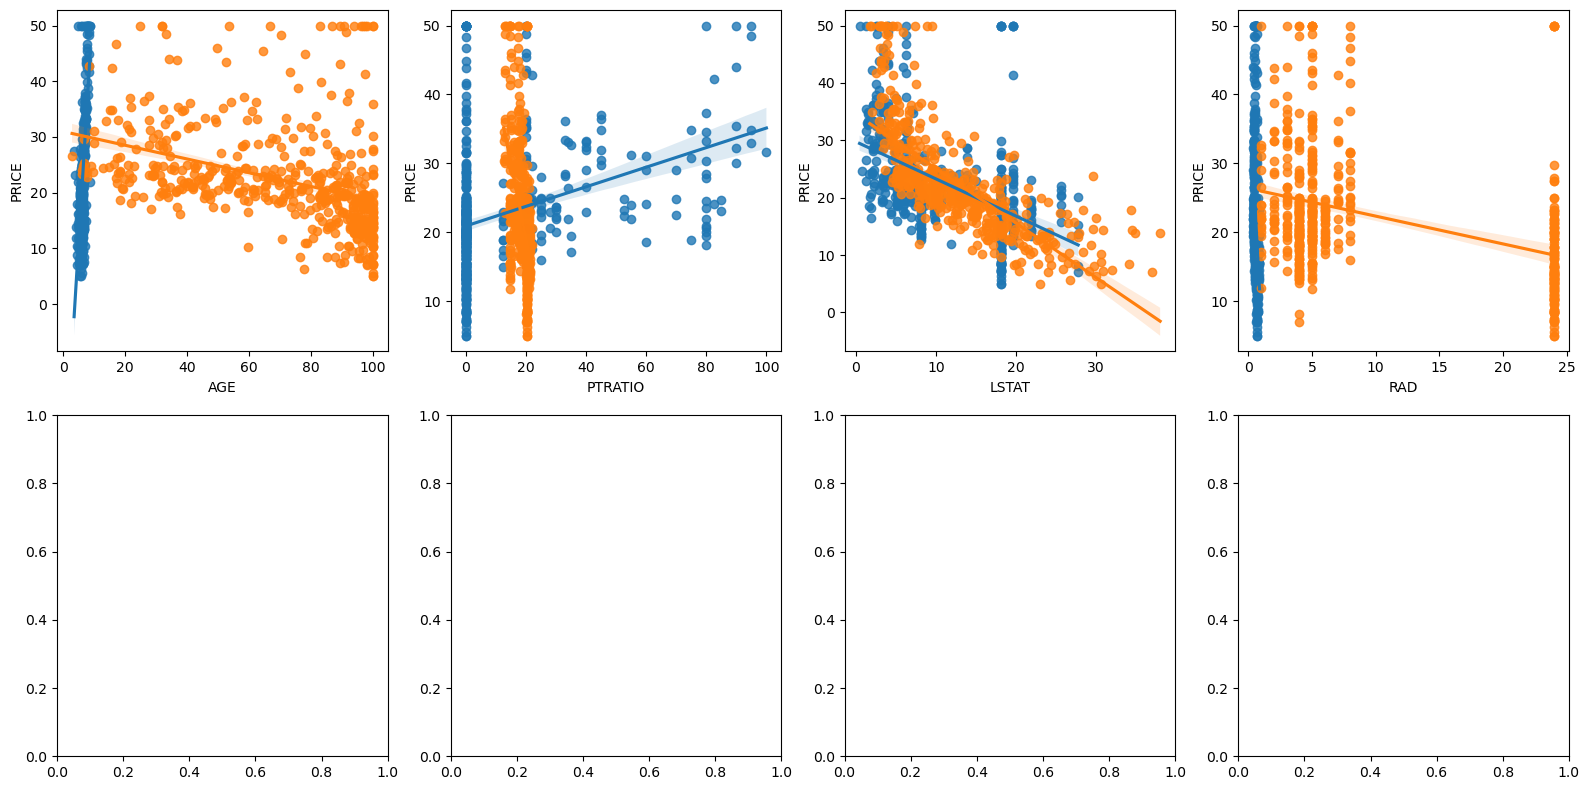

In [25]:

bostonDF['RAD'] = bostonDF['RAD'].astype(float)

fig , axs = plt.subplots(figsize = (16, 8), ncols=4, nrows=2)
lm_features= ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features) :
    row = int(1/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

plt.tight_layout()  # 그래프 간격을 조절합니다.
plt.show()  # 그래프를 출력합니다.


In [26]:
## 보스턴 주택 가격 회귀 모델

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 원-핫 인코딩을 통해 범주형 변수를 수치형으로 변환
bostonDF = pd.get_dummies(bostonDF, columns=['CHAS', 'RAD'], drop_first=True)

In [27]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM      506 non-null    float64
 1   ZN        506 non-null    float64
 2   INDUS     506 non-null    float64
 3   NOX       506 non-null    float64
 4   RM        506 non-null    float64
 5   AGE       506 non-null    float64
 6   DIS       506 non-null    float64
 7   TAX       506 non-null    float64
 8   PTRATIO   506 non-null    float64
 9   B         506 non-null    float64
 10  LSTAT     506 non-null    float64
 11  PRICE     506 non-null    float64
 12  CHAS_1    506 non-null    bool   
 13  RAD_2.0   506 non-null    bool   
 14  RAD_3.0   506 non-null    bool   
 15  RAD_4.0   506 non-null    bool   
 16  RAD_5.0   506 non-null    bool   
 17  RAD_6.0   506 non-null    bool   
 18  RAD_7.0   506 non-null    bool   
 19  RAD_8.0   506 non-null    bool   
 20  RAD_24.0  506 non-null    bool  

In [28]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

In [29]:
# 선형회귀 OLS로 학습/예측/평가

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

### 평가지표들 

In [30]:
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.517, RMSE : 4.185
Variance score : 0.754


In [31]:
## intercept(절편)과 coefficients ( 회귀계수 )
print('절편값 : ', lr.intercept_)
print('회귀 계수 값 : ', np.round(lr.coef_, 1))

절편값 :  42.08931146196162
회귀 계수 값 :  [ -0.1   0.1   0.  -20.    3.2   0.   -1.9  -0.   -1.    0.   -0.6   3.
   0.4   3.6   1.5   1.7  -0.3   5.6   3.7   7.6]


In [32]:
# 피쳐별 회귀 계수 값으로 다시 매핑, 높은 값 순으로 정렬
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

RAD_24.0     7.6
RAD_7.0      5.6
RAD_8.0      3.7
RAD_3.0      3.6
RM           3.2
CHAS_1       3.0
RAD_5.0      1.7
RAD_4.0      1.5
RAD_2.0      0.4
ZN           0.1
INDUS        0.0
AGE          0.0
TAX         -0.0
B            0.0
CRIM        -0.1
RAD_6.0     -0.3
LSTAT       -0.6
PTRATIO     -1.0
DIS         -1.9
NOX        -20.0
dtype: float64

In [33]:
# NOX는 너무 작고, RAD 원핫 제외, RM이 양의 값중 가장 큼.

In [34]:
# 교차 검증 : MSE , RMSE 측정
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1 , inplace=False)
lr = LinearRegression()

# cross_val_score() 로 폴드 5세트로 MSE를 구한 뒤. 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score( scoring='neg_mean_squared_error')로 반환되는 값은 모두 음수
print('5 folds 의 개별 Negative MSE scores : ', np.round( neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round( rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format( avg_rmse, 2))

5 folds 의 개별 Negative MSE scores :  [-13.39 -23.42 -35.75 -80.61 -36.29]
5 folds 의 개별 RMSE scores :  [3.66 4.84 5.98 8.98 6.02]
5 folds 의 평균 RMSE : 5.896


# 05_06_규제선형모델 - 릿지,라쏘,엘라스틱넷_보스턴주택가격
## 릿지 회귀

In [76]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10 설정. 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [80]:
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.717 -23.984 -34.149 -75.879 -23.898]
 5 folds 의 개별 RMSE scores :  [3.423 4.897 5.844 8.711 4.889]
 5 folds 의 평균 RMSE : 5.553 


### 릿지 알파 값을 변화시키면서 RMSE 변화 보기

In [83]:
alphas = [0, 0.1, 1, 10, 100]
# alphas 반복하면서 rmse 구함
for alpha in alphas :
    ridge = Ridge(alpha = alpha)

    # coross_val_score를 이용해 5 폴드의 평균 rmse를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일때 5 fords의 평균 RMSE : {1:.3f} '.format(alpha, avg_rmse))

alpha 0 일때 5 fords의 평균 RMSE : 5.896 
alpha 0.1 일때 5 fords의 평균 RMSE : 5.853 
alpha 1 일때 5 fords의 평균 RMSE : 5.717 
alpha 10 일때 5 fords의 평균 RMSE : 5.553 
alpha 100 일때 5 fords의 평균 RMSE : 5.412 


각 alpha에 따른 회귀 계수 값을 시각화. 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성



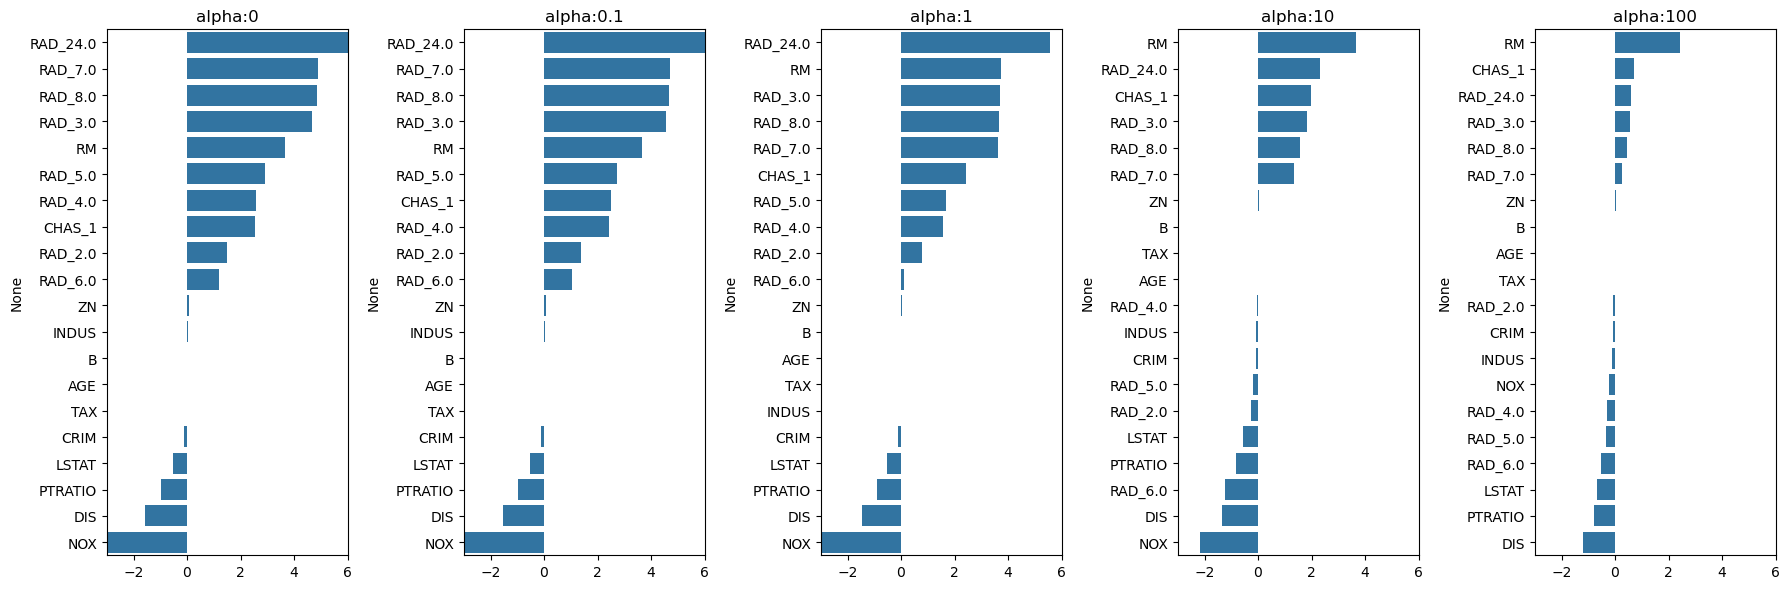

In [88]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.tight_layout()
plt.show()

alpha 값에 따른 컬럼별 회귀계수 출력

In [91]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RAD_24.0,7.461674,7.194381,5.563397,2.310894,0.582591
RAD_7.0,4.878992,4.705508,3.612509,1.337497,0.251003
RAD_8.0,4.839836,4.679705,3.664162,1.570292,0.452514
RAD_3.0,4.681253,4.546486,3.682484,1.838888,0.570130
RM,3.665491,3.675916,3.728491,3.667713,2.436704
RAD_5.0,2.918493,2.742950,1.672689,-0.193213,-0.351776
RAD_4.0,2.576234,2.441079,1.584732,-0.035416,-0.303516
CHAS_1,2.524163,2.513590,2.439375,1.991144,0.724254
RAD_2.0,1.488905,1.394168,0.773033,-0.255051,-0.059063
RAD_6.0,1.185839,1.035808,0.112018,-1.233464,-0.510752


## 라쏘회귀

In [95]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval

In [99]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.701 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.691 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.697 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.905 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.226 


In [101]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.912167,3.918168,2.765469,1.230766,0.000000
CHAS_1,1.661671,1.314871,0.000000,0.000000,0.000000
RAD_24.0,1.633373,0.775634,0.000000,0.000000,0.000000
RAD_3.0,1.323972,0.897973,0.000000,0.000000,0.000000
RAD_8.0,0.590092,0.000000,0.000000,0.000000,0.000000
ZN,0.045418,0.043819,0.043056,0.043497,0.036646
B,0.009695,0.009467,0.008568,0.007424,0.006163
RAD_5.0,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RAD_7.0,0.000000,0.000000,0.000000,0.000000,0.000000


## 엘라스틱넷 회귀


In [120]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.587 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.574 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.555 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.758 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.138 


In [122]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.676084,3.574217,2.103637,1.070492,0.000000
CHAS_1,1.496120,1.184811,0.000000,0.000000,0.000000
RAD_24.0,1.383250,0.911340,0.000000,0.000000,0.000000
RAD_3.0,1.267105,0.932282,0.000000,0.000000,0.000000
RAD_8.0,0.771750,0.399777,0.000000,0.000000,0.000000
RAD_7.0,0.255691,0.000000,0.000000,0.000000,0.000000
ZN,0.046484,0.045738,0.046041,0.045563,0.036390
B,0.009529,0.009331,0.008065,0.007279,0.006442
RAD_4.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
NOX,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000


## 선형 회귀 모델을 위한 데이터 변환

피처데이터세트에 적용하는 변환작업
1. StandardScaler or MinMaxScaler
2. 1을 수행 후 예측성능에 향상이 없을 경우, 다항 특성 적용
3. 원래 값에 log를 적용


타겟 값에 적용하는 변환작업
 * 일반적으로, 로그변환 적용

In [126]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [129]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 20) (506, 20)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.853 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.717 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.553 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.412 
(506, 20) (506, 20)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.893 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.866 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.706 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.572 
(506, 230) (506, 20)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 12.436 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 9.034 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 6.144 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.148 
(506, 20) (506, 20)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.829 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.562 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.931 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.590 
(506, 230) (506, 20)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.535 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.446 
alpha 10일 때 5 폴드 세트의 평균 RM